In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.rc('figure', figsize=(9, 5)) # Default figure size
plt.rc('font', size=14)

# **Datascience Lab 12 - Regression Analysis**

## Lab 12-1: Data Processing and Filtering for this lab (1pt)

You have `data_lab12.csv`, which is (again) the weekly Seoul city public bike rent log.
In this time, all the rows with `'Distance'==0 or 'Usage Time'==0` were filtered out already.

In this lab, we will process the data again for regression analysis.

In [3]:
df = pd.read_csv('data_lab12.csv')
df

,Rental Date,Date Rental Time,Rental Station No.,Rental Station Name,Rental Classification Code,Gender,Age Code,Number of Uses,Momentum,Carbon Amount,Distance,Usage Time
0,01/01/2021,0,1952,1952. 천왕연지타운2단지 앞,정기권,F,~10대,1,22.15,0.20,860.60,6
1,01/01/2021,0,1047,1047. 건강보험 강동지사kt,정기권,F,20대,1,27.13,0.32,1370.00,12
2,01/01/2021,0,3411,3411.종묘,정기권,F,20대,1,27.18,0.24,1055.93,8
3,01/01/2021,0,153,153. 성산2교 사거리,정기권,F,20대,1,36.54,0.38,1618.74,11
4,01/01/2021,0,154,154. 마포구청역,정기권,F,20대,1,49.67,0.63,2726.57,15
...,...,...,...,...,...,...,...,...,...,...,...,...
51800,06/01/2021,23,1668,1668. 중계역 6번출구,일일권,F,20대,1,23.70,0.26,1108.24,11
51801,06/01/2021,23,2189,2189.삼성서비스센터(관악점),일일권,F,60대,1,62.18,0.43,1847.25,17
51802,06/01/2021,23,2016,2016. 신대방삼거리역 3번출구쪽,일일권,M,20대,1,56.86,0.51,2209.07,18
51803,06/01/2021,23,725,725. 양강중학교앞 교차로,일일권,M,20대,1,44.00,0.35,1521.90,15


First, add a column `'Average Speed'` calculated in km/h. Note that 'Distance' is in meter, and Usage Time is in minute.

Hint: use `apply` and `lambda`.

In [5]:
# 12-1 begin
def calculate_average_speed(distance, usage_time):
    distance_km = distance / 1000
    usage_time_hr = usage_time / 60
    average_speed = distance_km / usage_time_hr
    return average_speed

df['Average Speed'] = df.apply(lambda row: calculate_average_speed(row['Distance'], row['Usage Time']), axis=1)
df


,Rental Date,Date Rental Time,Rental Station No.,Rental Station Name,Rental Classification Code,Gender,Age Code,Number of Uses,Momentum,Carbon Amount,Distance,Usage Time,Average Speed
0,01/01/2021,0,1952,1952. 천왕연지타운2단지 앞,정기권,F,~10대,1,22.15,0.20,860.60,6,8.606000
1,01/01/2021,0,1047,1047. 건강보험 강동지사kt,정기권,F,20대,1,27.13,0.32,1370.00,12,6.850000
2,01/01/2021,0,3411,3411.종묘,정기권,F,20대,1,27.18,0.24,1055.93,8,7.919475
3,01/01/2021,0,153,153. 성산2교 사거리,정기권,F,20대,1,36.54,0.38,1618.74,11,8.829491
4,01/01/2021,0,154,154. 마포구청역,정기권,F,20대,1,49.67,0.63,2726.57,15,10.906280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51800,06/01/2021,23,1668,1668. 중계역 6번출구,일일권,F,20대,1,23.70,0.26,1108.24,11,6.044945
51801,06/01/2021,23,2189,2189.삼성서비스센터(관악점),일일권,F,60대,1,62.18,0.43,1847.25,17,6.519706
51802,06/01/2021,23,2016,2016. 신대방삼거리역 3번출구쪽,일일권,M,20대,1,56.86,0.51,2209.07,18,7.363567
51803,06/01/2021,23,725,725. 양강중학교앞 교차로,일일권,M,20대,1,44.00,0.35,1521.90,15,6.087600


Then, leave data between 95--99 percentile of `'Average Speed'` for each gender. 
This is to remove the top 1% outliers, and then extract the fast bikers in general.

Hint: use `Series.quantile` to get the threshold speed for the filter.
* https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html

In [6]:

# 12-1 end
def filter_speed(df):
    lower_threshold = df['Average Speed'].quantile(0.95)  # Calculate the 95th percentile
    upper_threshold = df['Average Speed'].quantile(0.99)  # Calculate the 99th percentile
    return df[(df['Average Speed'] >= lower_threshold) & (df['Average Speed'] <= upper_threshold)]


filtered_data = df.groupby('Gender').apply(filter_speed).reset_index(drop=True)
filtered_data

,Rental Date,Date Rental Time,Rental Station No.,Rental Station Name,Rental Classification Code,Gender,Age Code,Number of Uses,Momentum,Carbon Amount,Distance,Usage Time,Average Speed
0,01/01/2021,0,623,623. 서울시립대 정문 앞,정기권,F,20대,1,15.06,0.15,633.94,3,12.67880
1,01/01/2021,1,754,754. 목동1단지아파트 118동 앞 (월촌초등학교 정류소 옆),일일권,F,40대,1,45.30,0.41,1760.00,8,13.20000
2,01/01/2021,2,1150,1150. 송정역 1번출구,정기권,F,20대,1,26.99,0.33,1420.00,6,14.20000
3,01/01/2021,3,2082,2082.7호선 이수역7번출구,정기권,F,20대,1,32.93,0.36,1540.00,7,13.20000
4,01/01/2021,4,1010,1010. 강동세무서,정기권,F,50대,1,18.47,0.17,717.70,3,14.35400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,06/01/2021,18,1180,1180. 마곡엠밸리 15단지(1502동) 건너편,정기권,M,60대,1,35.54,0.24,1019.85,4,15.29775
2068,06/01/2021,19,1702,1702. 녹천역 1번출구 앞,정기권,M,20대,1,39.36,0.33,1420.00,6,14.20000
2069,06/01/2021,19,3420,3420.성균관대입구사거리(맥도날드),정기권,M,30대,1,10.11,0.07,283.75,1,17.02500
2070,06/01/2021,22,1709,1709. 쌍문역4번출구 주변,정기권,M,20대,1,14.58,0.13,566.40,2,16.99200


---
## Lab 12-2: Visualize the data for confirm the filtered results. (2pt)

Draw a scatter plot, with x axis = `Usage Time` and y axis = `Distance`.

Hint: in `seaborn.scatterplot`, use `hue` to plot data in groups.
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html

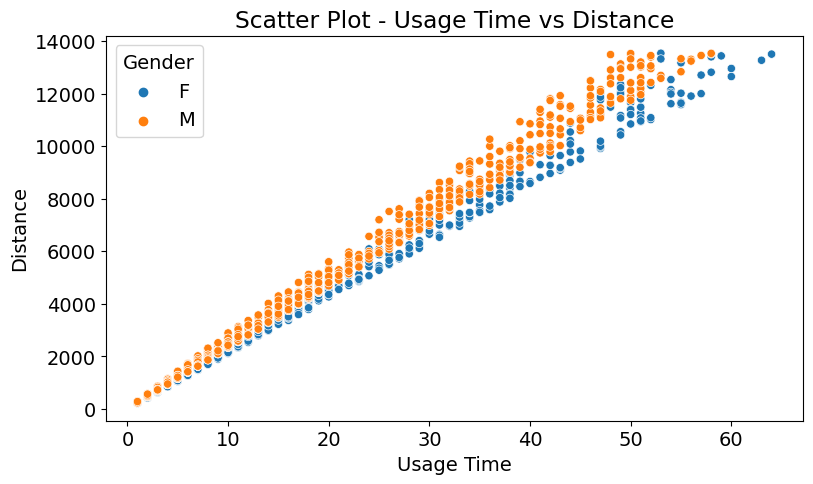

In [7]:
# 12-2 start
sns.scatterplot(data=filtered_data, x='Usage Time', y='Distance', hue='Gender')

plt.title('Scatter Plot - Usage Time vs Distance')
plt.xlabel('Usage Time')
plt.ylabel('Distance')

plt.show()
# 12-2 end

## ---
## Lab 12-3: Linear Regression (3pt)

Try linear regressons between `Usage Time`(as input data) and `Distance`(as target). Interpret the slope and intercept into an average speed, and then compare that with the averaged `Average Speed` for each gender.


Example result (Doesn't neccessary to be the same):

||From regression (km/h)|From real data (km/h)|
|------:|---:|---:|
|**Male**|15.01506|15.15053|
|**Female**|13.45640|13.64715|

In [17]:
# 12-3 start

df_M = filtered_data[filtered_data['Gender'] == 'M']
df_F = filtered_data[filtered_data['Gender'] == 'F']

reg_M = LinearRegression()
reg_M.fit(df_M['Usage Time'].values.reshape(-1, 1), df_M['Distance'])

reg_F = LinearRegression()
reg_F.fit(df_F['Usage Time'].values.reshape(-1, 1), df_F['Distance'])

speed_M = reg_M.coef_[0] * 60 / 1000
speed_F = reg_F.coef_[0] * 60 / 1000

In [18]:
pd.DataFrame([[f'{speed_M:.5f}', f'{df_M["Average Speed"].mean():.5f}']
             ,[f'{speed_F:.5f}', f'{df_F["Average Speed"].mean():.5f}']]
             , columns=['From regression (km/h)', 'From real data (km/h)'], index=['Male', 'Female'])
# 12-3 end

,From regression (km/h),From real data (km/h)
Male,15.01506,15.15053
Female,13.45640,13.64715


## ---
## Lab 12-4: Predict using Linear Regression (4pt)

Use `train_test_split` to separate the train and test sets. Please refer to the hint below for how to use it.

Train the regression model through the train set and validate it using the test set. In this case, use the `.score` method.

Scatter plot the test sets and draw a regression line on it.

- hint
    - **train_test_split**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    - **.score**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [28]:
# 12-4 start
# Use train_test_split to separate the train and test sets. Please refer to the hint below for how to use it.
X = filtered_data['Usage Time'].values.reshape(-1, 1)
y = filtered_data['Distance'].values.reshape(-1, 1)

test_size = 0.3
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [30]:
# Validate regression model using the test set. In this case, use the .score method.
reg = LinearRegression()
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
print(f'The coefficient of determination of the prediction is {score*100:.3f}%')

The coefficient of determination of the prediction is 99.001%


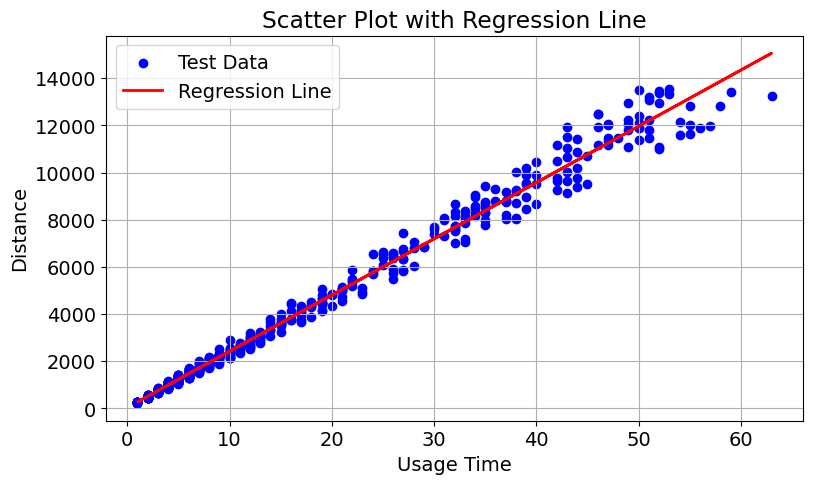

In [31]:
# Scatter plot the test sets and draw a regression line on it.
# Be sure to indicate *legend*, *grid* and x/y label.

# Scatter plot the test set
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Draw a regression line
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=2, label='Regression Line')

# Add legend, grid lines, and labels
plt.legend()
plt.grid(True)
plt.xlabel('Usage Time')
plt.ylabel('Distance')
plt.title('Scatter Plot with Regression Line')

# Show the plot
plt.show()

# 12-4 end